In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [4]:
class ModelMetrics:
    def roc_auc_curve(self,x_train,y_train,x_test,y_test,criterion="entropy",max_depth=5,thresher=10,color="#FF7722",linewidth=3,figsize=(10,8)):
        sns.set()
        juj={}
        dum_y = np.array(pd.get_dummies(y_train))
        dum_yt = np.array(pd.get_dummies(y_test))
        for ret in range(dum_yt.shape[1]):
            ter = DecisionTreeClassifier(max_depth=max_depth,criterion=criterion)
            ter.fit(x_train,y_train)
            probabs = ter.predict_proba(x_test)
            tpr,fpr=[],[]
            for k in np.linspace(0,1,thresher):
                preds = []
                for j in probabs[:,ret]:
                    preds.append(1 if j>=k else 0)
                preds = np.array(preds)
                tpr.append(round(len(preds[(dum_yt[:,ret]==1)&(preds==1)])/len(dum_yt[:,ret][dum_yt[:,ret]==1]),3))
                fpr.append(round(len(preds[(preds==1)&(dum_yt[:,ret]==0)])/len(dum_yt[:,ret][dum_yt[:,ret]==0]),3))
            juj[ret]=[tpr,fpr]
        for i in juj:
            fuf=[]
            for j in range(len(juj[i][1])-1):
                # Calculating the AUC value
                fuf.append((juj[i][1][j+1]-juj[i][1][j])*(juj[i][0][j+1]+juj[i][0][j]))
            auc = -sum(fuf)/2
            plt.figure(figsize=figsize)
            plt.plot(juj[i][1],juj[i][0],color=color,linewidth=linewidth)
            plt.title(f"ROC-AUC Curve: Class {i}",fontsize=15)
            plt.ylabel("True Positive Rate (TPR)")
            plt.xlabel("False Positive Rate (FPR)")
            plt.text(0.85,0.1,f"AUC: {round(auc,3)}", # Placing the AUC value on the plot.
                     bbox=dict(facecolor='white',edgecolor='black', boxstyle='round,pad=1'))
            plt.show()
    def confusion_matrix(self,y,y_preds,cmap=None,labels=None,annot=True,figsize=(10,8)):
        sns.reset_orig()
        t=[len(y_preds[(y_preds==j)&(y==i)]) for i in set(y) for j in set(y)]
        t = np.reshape(t,(len(set(y)),len(set(y))))
        label = labels if labels!=None else list(set(y))
        plt.figure(figsize=figsize)
        sns.heatmap(t,cmap=cmap,annot=annot,
                    xticklabels=label,yticklabels=label)
        plt.yticks(rotation=0)
        plt.ylabel("True Labels")
        plt.xlabel("Predicted Labels")
        return plt.show()
    def classification_report(self,y,y_preds,labels=None):
        self.accuracy = (np.sum(y_preds==y)/len(y)).round(2)
        self.precision,self.recall,self.f1=[],[],[]
        for i in set(y):
            prec = round((len(y_preds[(y_preds==i)&(y==i)])/len(y_preds[y_preds==i])),2)
            rec = round((len(y_preds[(y_preds==i)&(y==i)])/len(y[y==i])),2)
            self.precision.append(prec)
            self.recall.append(rec)
            self.f1.append(round((2*prec*rec)/(prec+rec),2))
        self.precision,self.recall,self.f1 = np.array(self.precision),np.array(self.recall),np.array(self.f1)
        class_rep = pd.DataFrame()
        class_rep["Precision"]=self.precision
        class_rep["Recall"] = self.recall
        class_rep["F1-Score"] = self.f1
        class_rep["Support"] = [len(y[y==i]) for i in set(y)]
        class_rep.loc[len(class_rep.index)] = ["","",self.accuracy,len(y)]
        class_rep.loc[len(class_rep.index)] = [self.precision.mean().round(2),self.recall.mean().round(2),
                                               self.f1.mean().round(2),len(y)]
        label = labels if labels!=None else list(set(y))
        label.extend(["Accuracy","Average"])
        class_rep.index=label
        return class_rep

## Iris Dataset

In [5]:
iris = pd.read_csv("Iris-Dataset.csv")
d = {j:i for i,j in enumerate(iris["y"].unique())}
iris["y"] = [d[i] for i in iris["y"]]

### Randomisation

In [6]:
x,y = np.array(iris.drop(iris.columns[-1],axis=1)),np.array(iris[iris.columns[-1]])
indes = np.arange(0,len(x))
random.shuffle(indes)
x = x[indes]
y = y[indes]

### Train-Test Split

In [7]:
test_size = 0.2

In [8]:
x_train,y_train = x[:int(len(x)*(1-test_size))], y[:int(len(x)*(1-test_size))]
x_test,y_test = x[int(len(x)*(1-test_size)):], y[int(len(x)*(1-test_size)):]

### Standardisation

In [9]:
for i in range(x_train.shape[1]):
    x_train[:,i] = (x_train[:,i]-x_train[:,i].mean())/np.std(x_train[:,i])
    x_test[:,i] = (x_test[:,i]-x_test[:,i].mean())/np.std(x_test[:,i])

### Iris Modeling

Criterion: gini


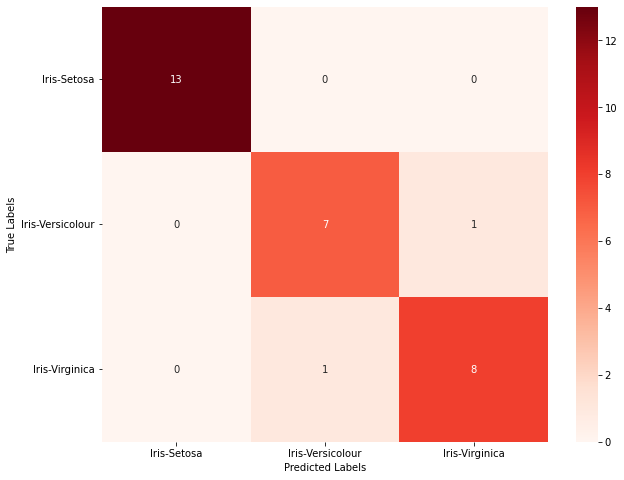

                 Precision Recall  F1-Score  Support
Iris-Setosa            1.0    1.0      1.00     13.0
Iris-Versicolour      0.88   0.88      0.88      8.0
Iris-Virginica        0.89   0.89      0.89      9.0
Accuracy                               0.93     30.0
Average               0.92   0.92      0.92     30.0


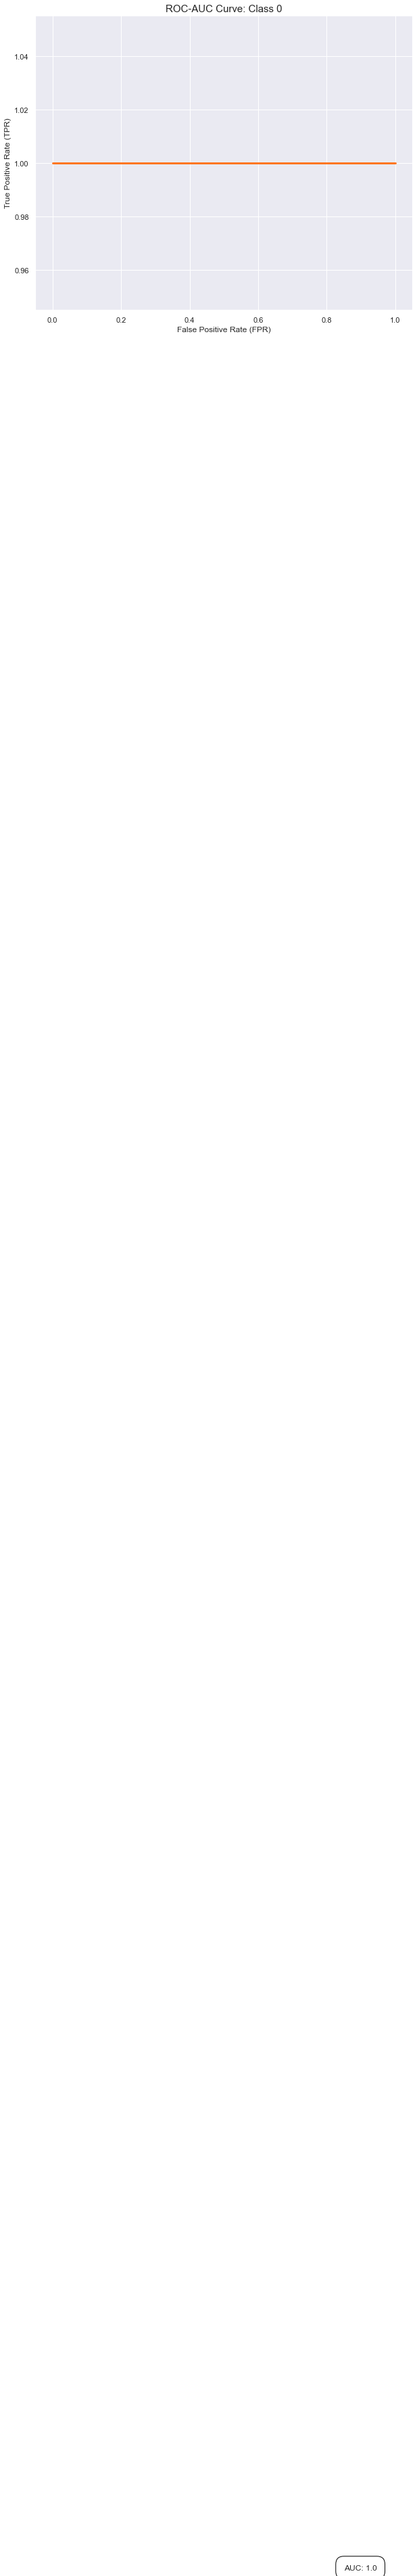

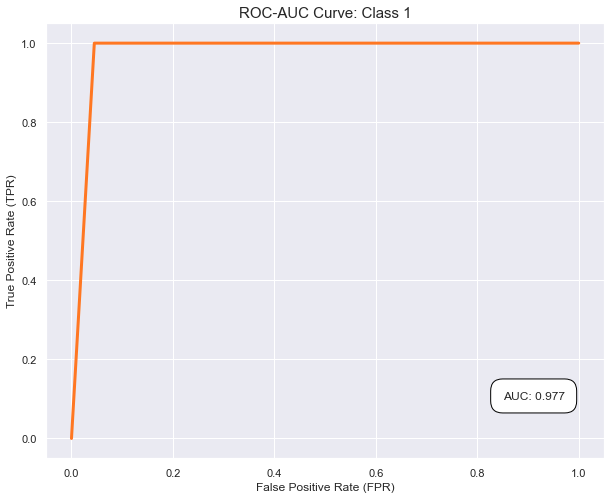

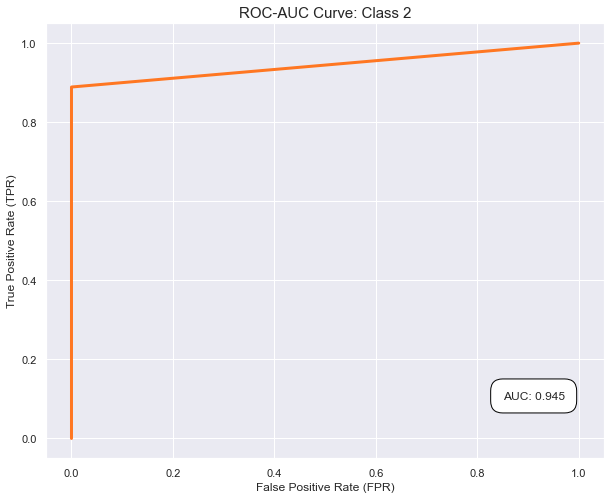

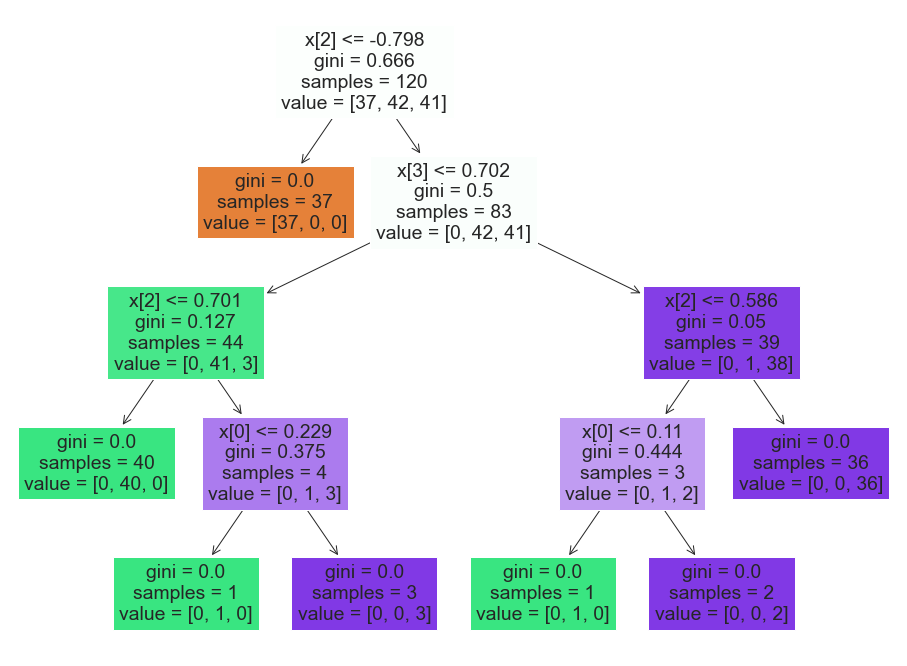

Criterion: entropy


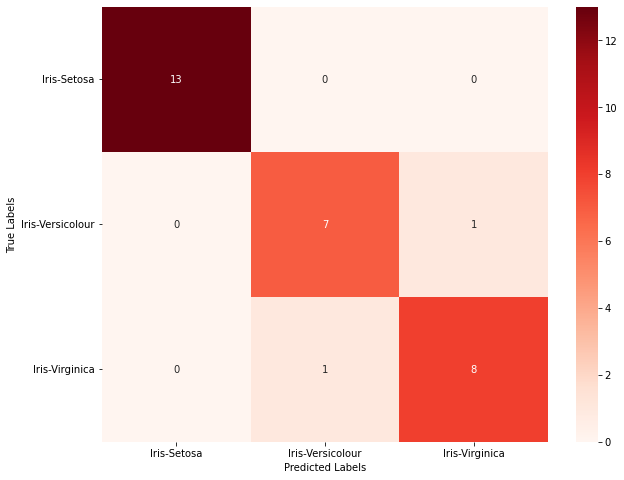

                 Precision Recall  F1-Score  Support
Iris-Setosa            1.0    1.0      1.00     13.0
Iris-Versicolour      0.88   0.88      0.88      8.0
Iris-Virginica        0.89   0.89      0.89      9.0
Accuracy                               0.93     30.0
Average               0.92   0.92      0.92     30.0


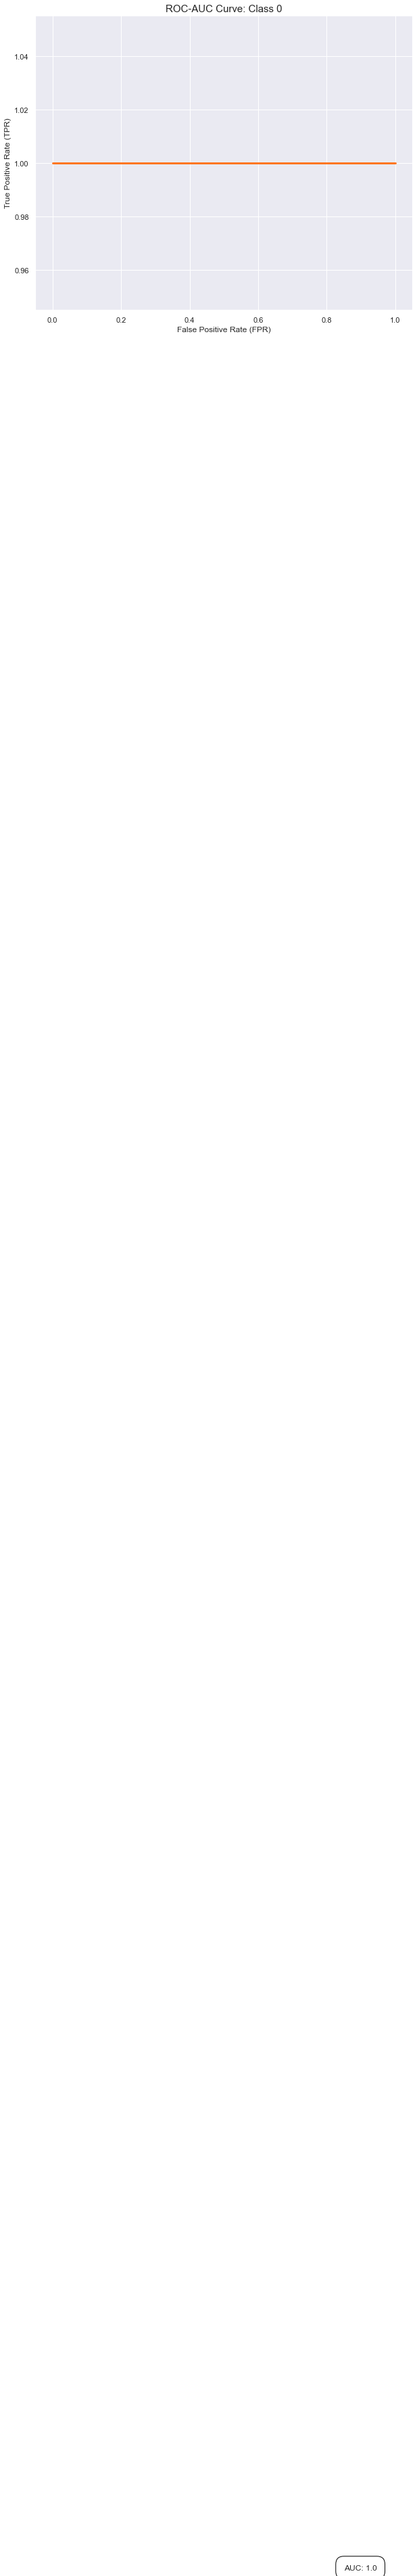

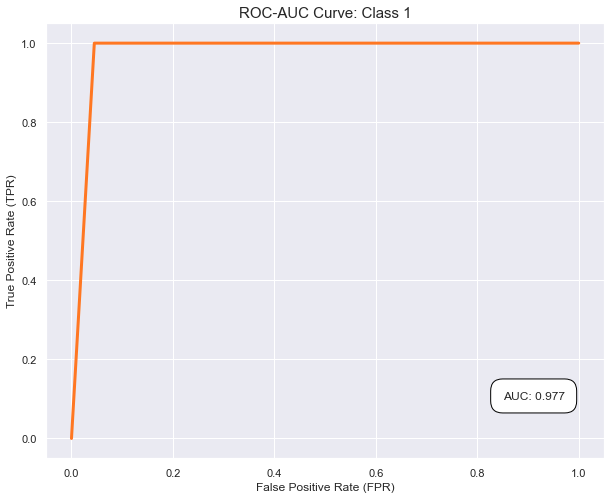

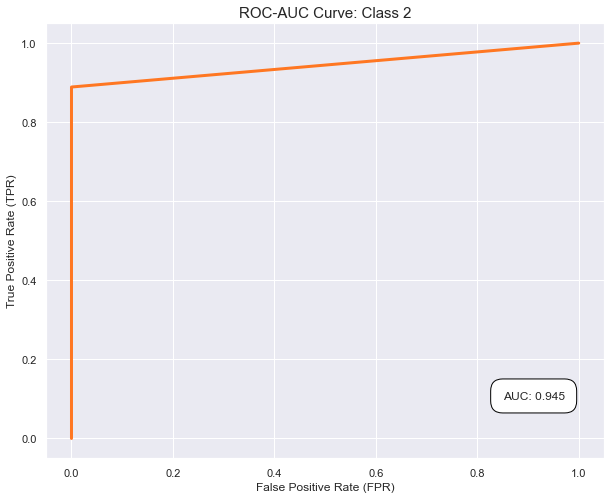

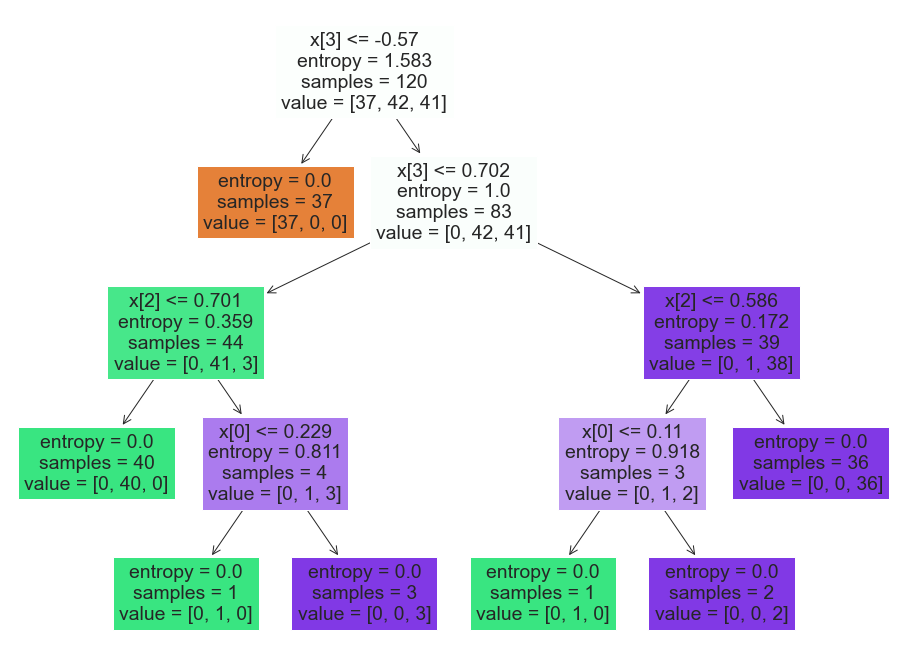

Criterion: log_loss


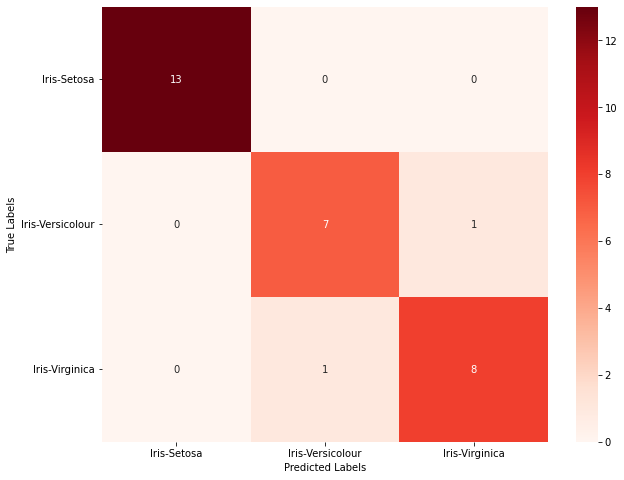

                 Precision Recall  F1-Score  Support
Iris-Setosa            1.0    1.0      1.00     13.0
Iris-Versicolour      0.88   0.88      0.88      8.0
Iris-Virginica        0.89   0.89      0.89      9.0
Accuracy                               0.93     30.0
Average               0.92   0.92      0.92     30.0


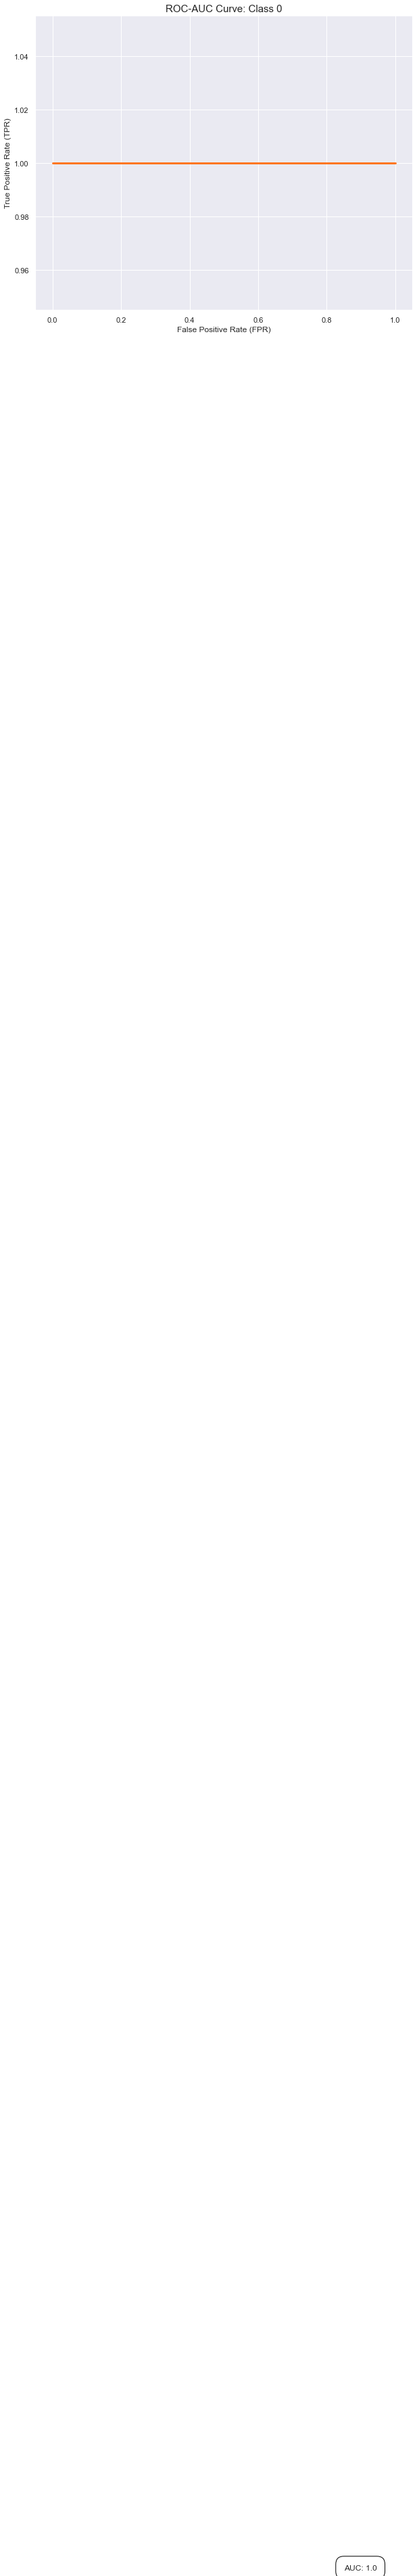

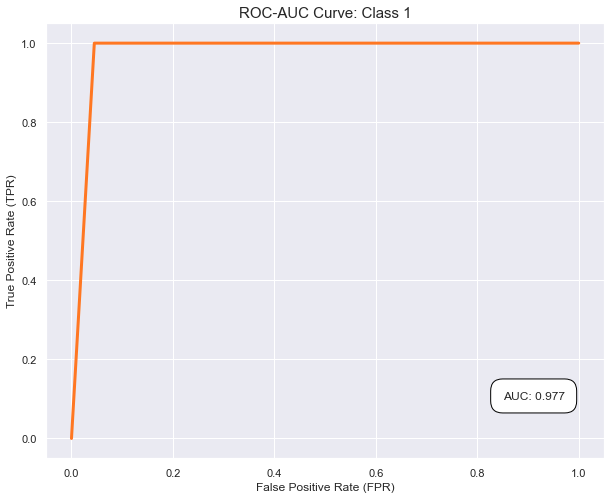

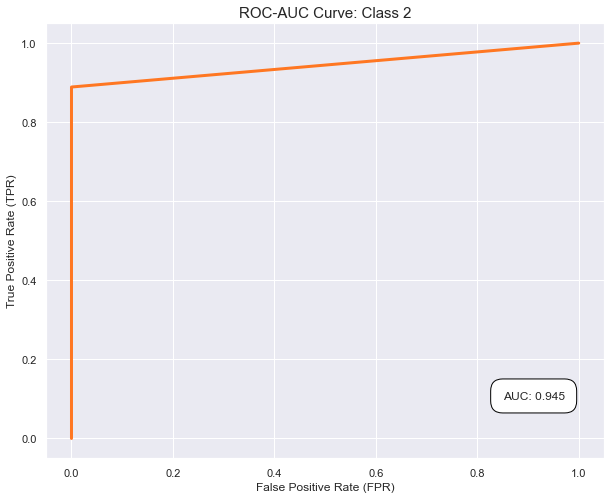

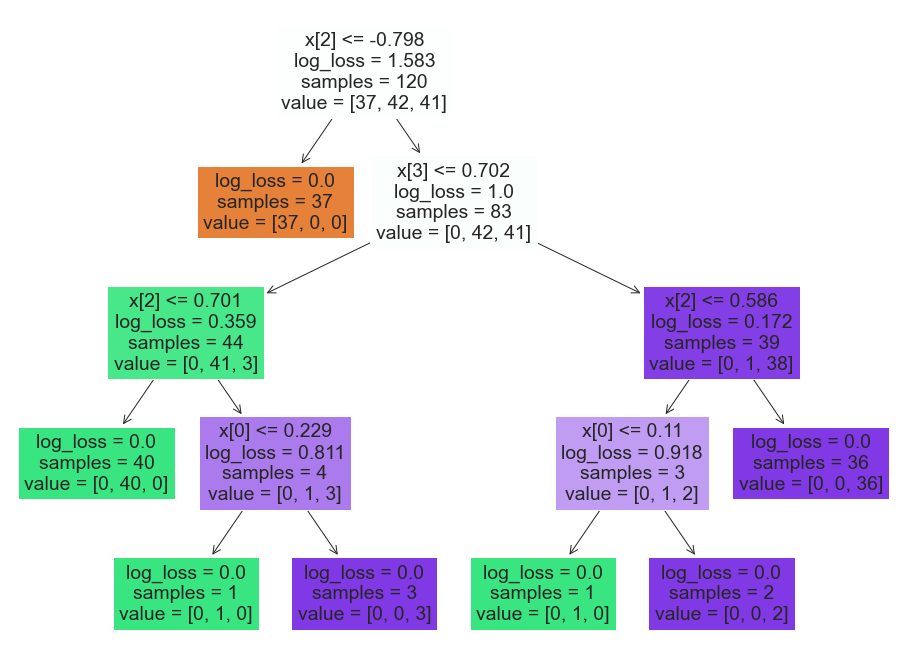

In [10]:
for i in ["gini","entropy","log_loss"]:
    print(f"Criterion: {i}")
    iris_dec = DecisionTreeClassifier(criterion=i)
    iris_dec.fit(x_train,y_train)
    iris_preds = iris_dec.predict(x_test)
    metrics = ModelMetrics()
    metrics.confusion_matrix(y_test,iris_preds,cmap="Reds",annot=True,labels=list(d.keys()),
                          figsize=(10,8))
    print(metrics.classification_report(y_test,iris_preds,labels=list(d.keys())))
    metrics.roc_auc_curve(x_train,y_train,x_test,y_test,criterion=i,max_depth=2,thresher=10)
    plt.figure(figsize=(16,12))
    plot_tree(iris_dec, filled = True)
    plt.show()

## MNIST Dataset

In [11]:
with np.load("mnist.npz") as data:
    x_train = data["training_images"]
    y_train = data["training_labels"]
    x_test = data["test_images"]
    y_test = data["test_labels"]
    v_x = data["validation_images"]
    v_y = data["validation_labels"]

### Merging Training and Validation Datasets

In [12]:
x_train = np.append(x_train,v_x,axis=0)
y_train = np.append(y_train,v_y,axis=0)

### Flattening Images

In [13]:
x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test, (10000,28*28))

### Merging Dummies for Labels

In [14]:
y_t = []
for i in range(len(y_train)):
    y_t.append([i[0] for i in y_train[i]].index(1))
y_train = np.array(y_t)

In [15]:
y_tt = []
for i in range(len(y_test)):
    y_tt.append([i[0] for i in y_test[i]].index(1))
y_test = np.array(y_tt)

### MNIST Modeling

Criterion: gini


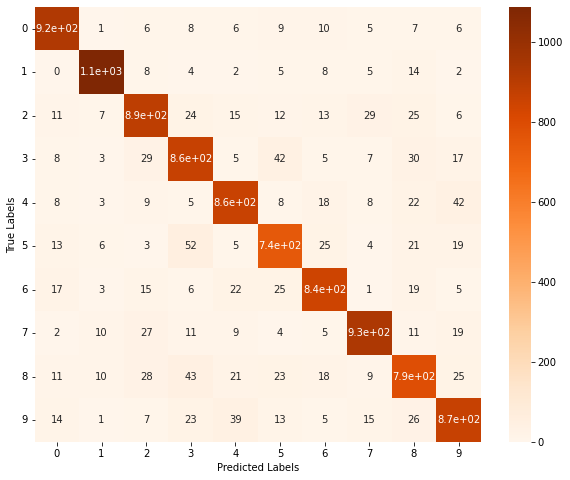

         Precision Recall  F1-Score  Support
0             0.92   0.94      0.93    980.0
1             0.96   0.96      0.96   1135.0
2             0.87   0.86      0.86   1032.0
3             0.83   0.86      0.84   1010.0
4             0.87   0.87      0.87    982.0
5             0.84   0.83      0.83    892.0
6             0.89   0.88      0.88    958.0
7             0.92    0.9      0.91   1028.0
8             0.82   0.81      0.81    974.0
9             0.86   0.86      0.86   1009.0
Accuracy                       0.88  10000.0
Average       0.88   0.88      0.88  10000.0


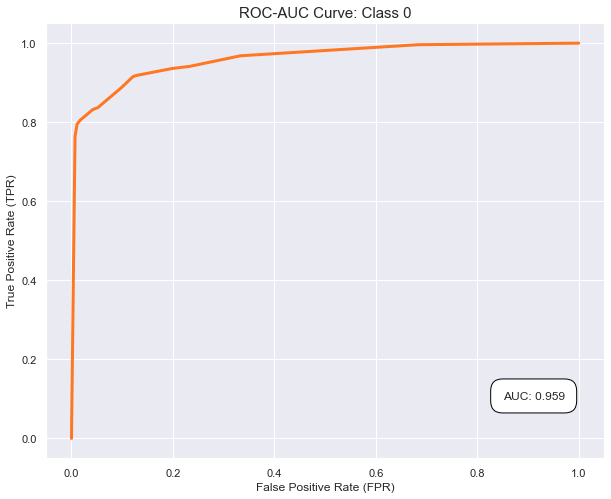

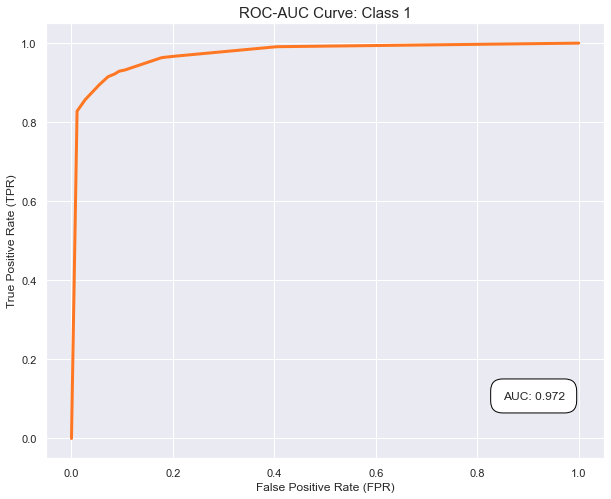

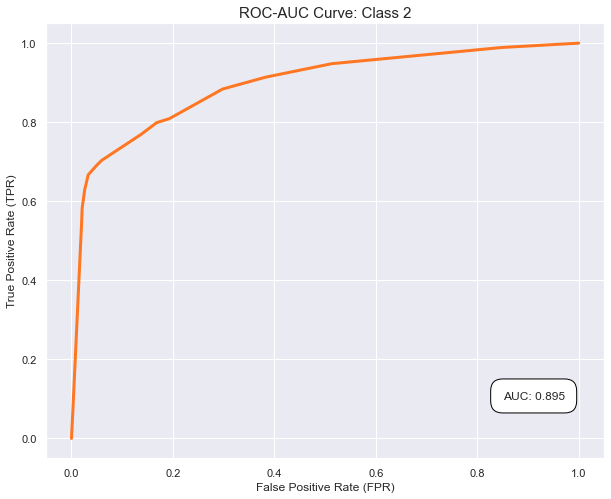

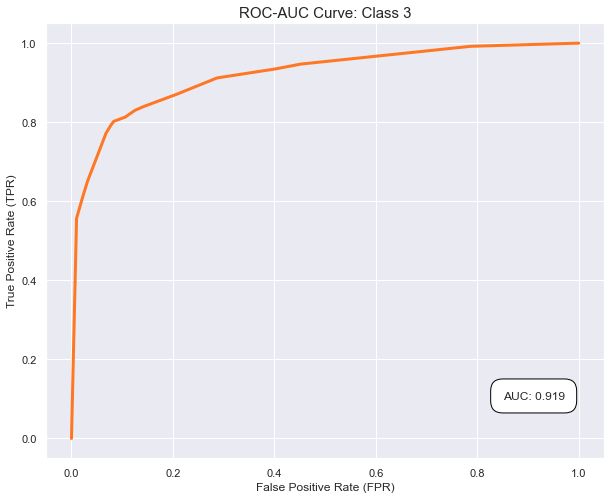

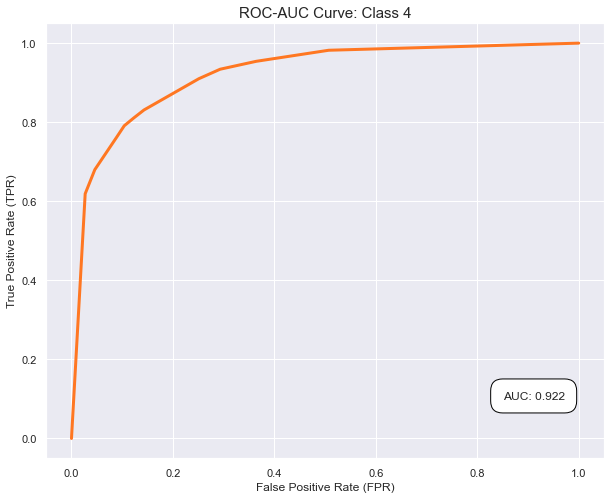

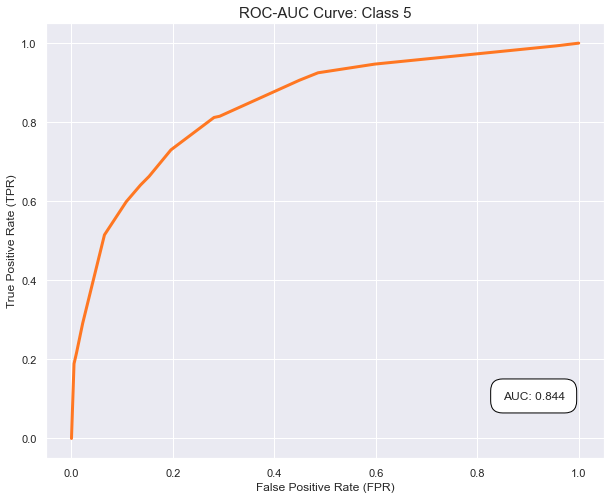

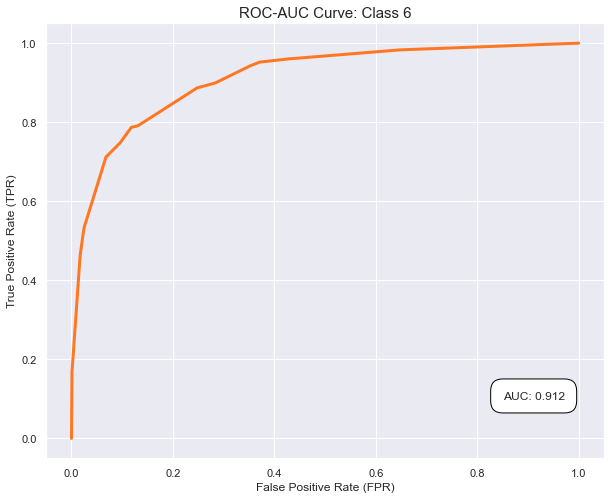

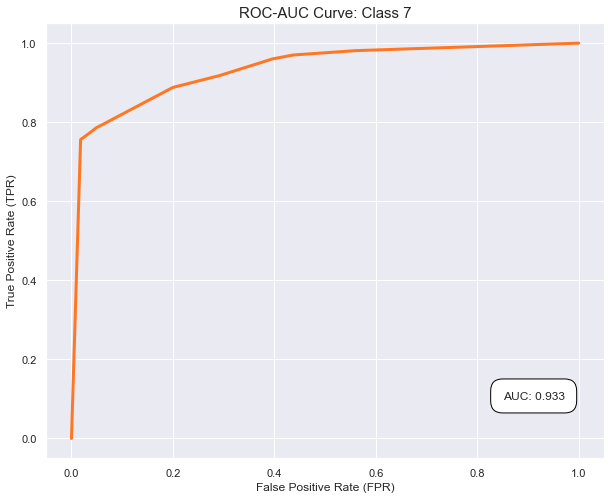

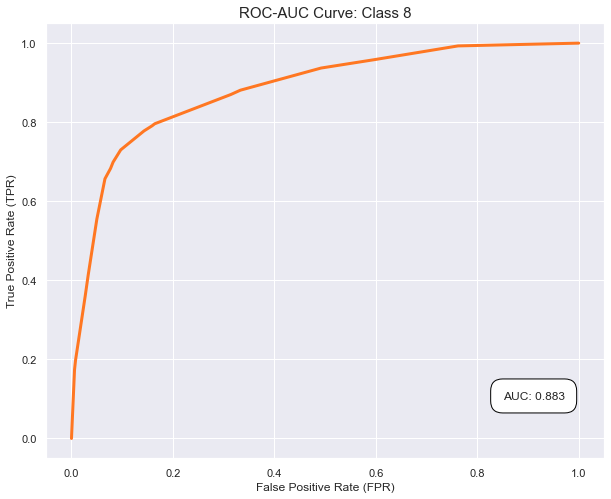

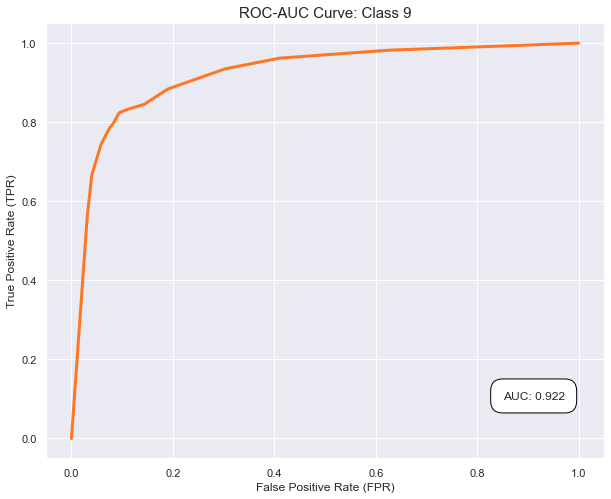

Criterion: entropy


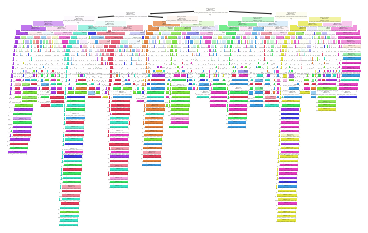

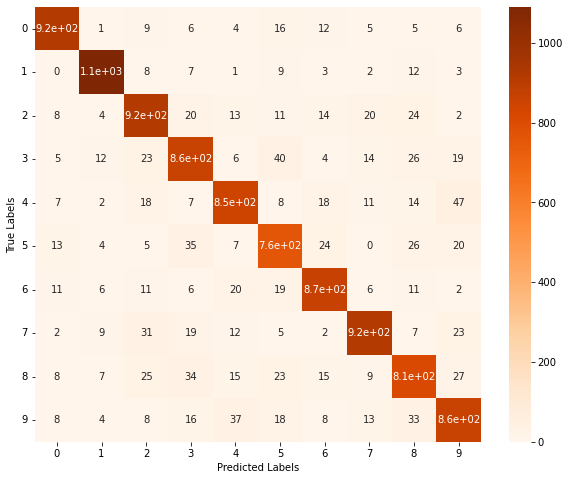

         Precision Recall  F1-Score  Support
0             0.94   0.93      0.93    980.0
1             0.96   0.96      0.96   1135.0
2             0.87   0.89      0.88   1032.0
3             0.85   0.85      0.85   1010.0
4             0.88   0.87      0.87    982.0
5             0.84   0.85      0.84    892.0
6              0.9    0.9      0.90    958.0
7             0.92   0.89      0.90   1028.0
8             0.84   0.83      0.83    974.0
9             0.85   0.86      0.85   1009.0
Accuracy                       0.88  10000.0
Average       0.88   0.88      0.88  10000.0


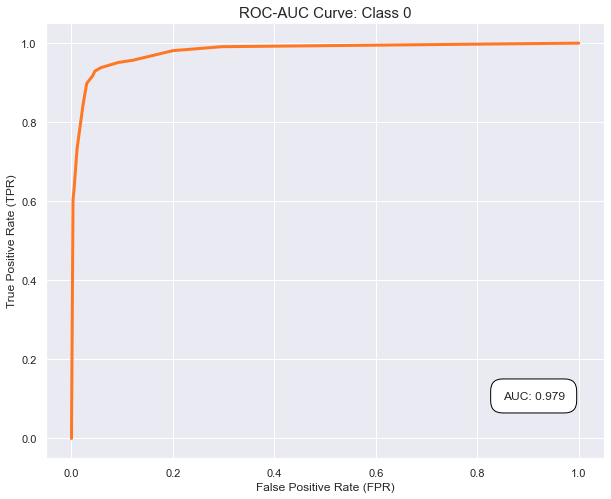

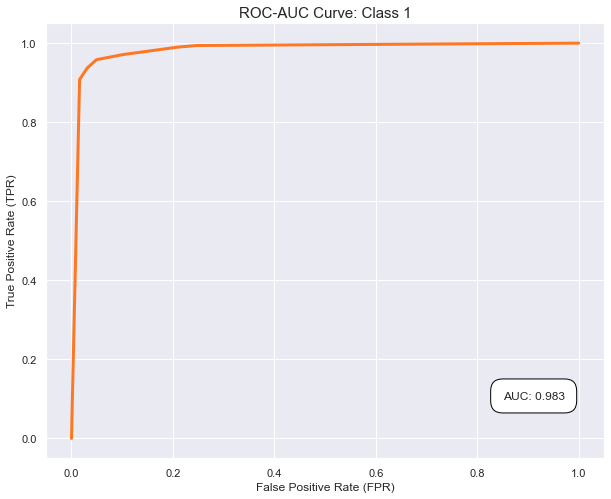

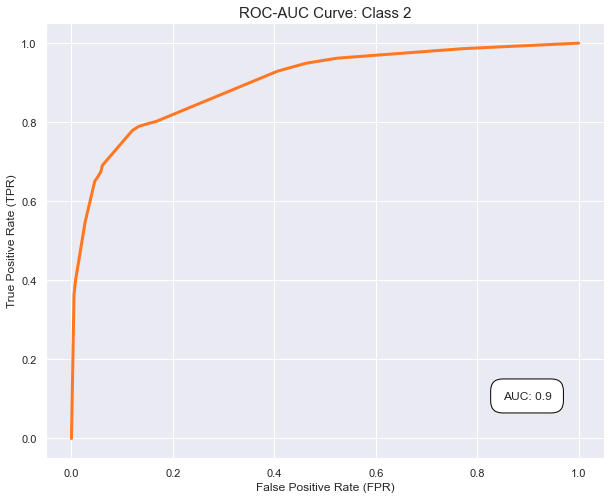

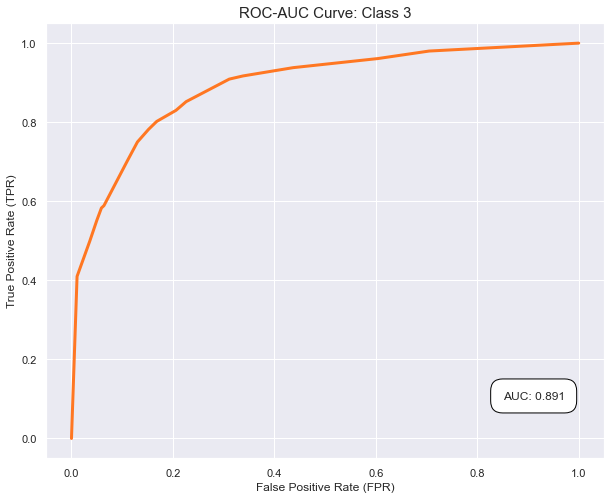

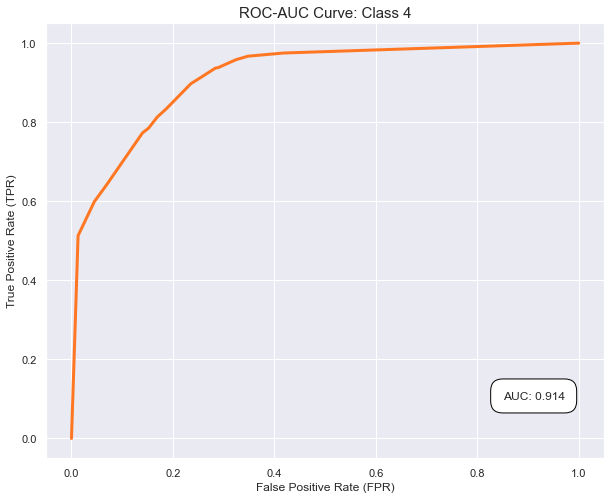

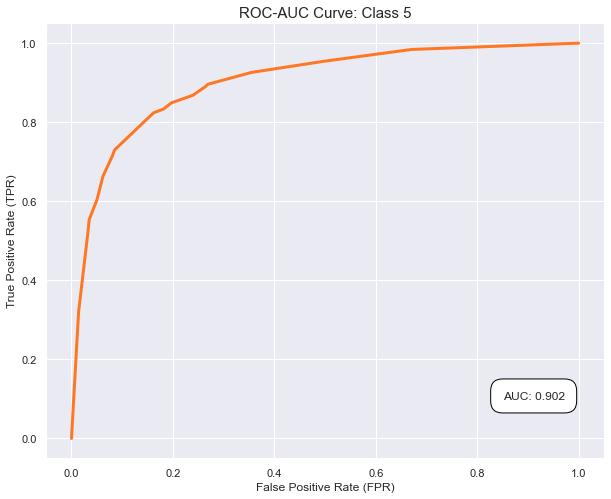

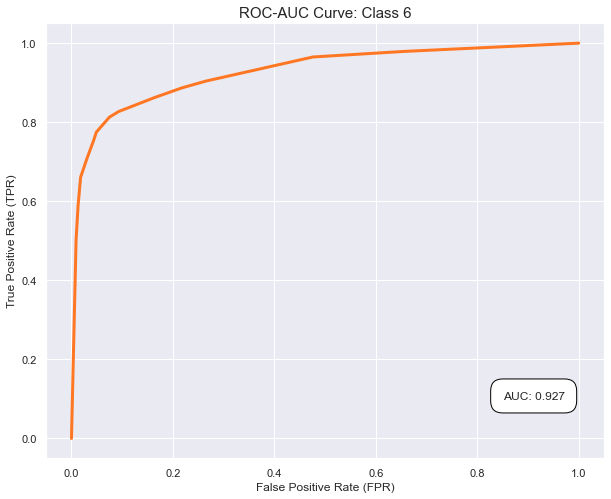

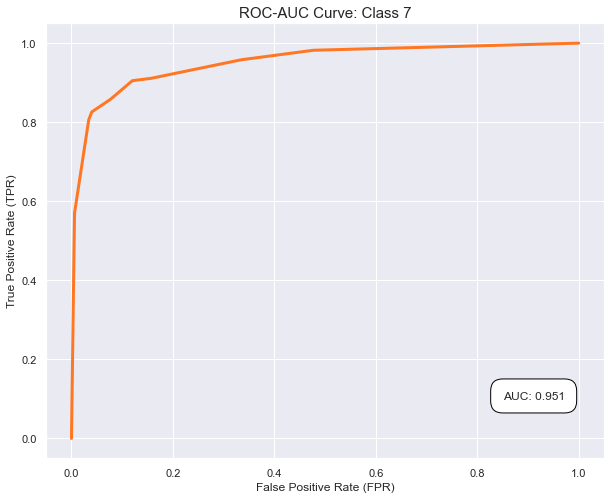

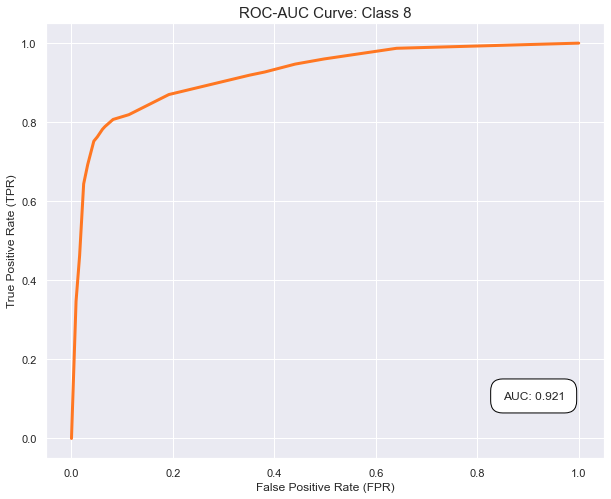

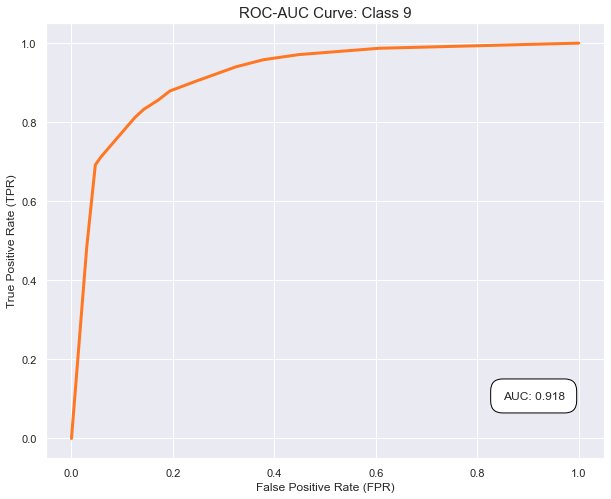

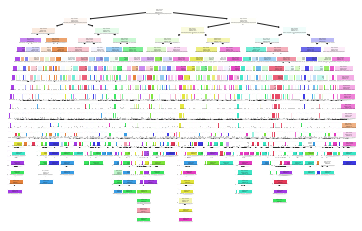

In [17]:
for i in ["gini","entropy"]:
    print(f"Criterion: {i}")
    mnist_dec = DecisionTreeClassifier(criterion=i)
    mnist_dec.fit(x_train,y_train)
    mnist_preds = mnist_dec.predict(x_test)
    metrics = ModelMetrics()
    metrics.confusion_matrix(y_test,mnist_preds,cmap="Oranges",annot=True,figsize=(10,8))
    print(metrics.classification_report(y_test,mnist_preds))
    metrics.roc_auc_curve(x_train,y_train,x_test,y_test,criterion=i,thresher=100)
    plot_tree(mnist_dec, filled = True)